## Load the dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

normalized_data_path = '../Normalization/A1-synthetic-normalized.csv'
data = pd.read_csv(normalized_data_path, sep='\t', header=0)  # '\t' for tab-separated values

print(data.head())


        #v1        v2        v3        v4        v5        v6        v7  \
0  1.280663 -0.793451  1.616521  1.004039 -0.676741  2.553385 -0.466353   
1  0.109896  1.522669 -0.154310 -0.992534  0.008298  1.684637 -0.344116   
2 -1.172442 -0.062932 -0.964088 -0.877683  0.109029  1.335112  0.121703   
3 -1.640673  0.863717  1.460254  0.860615  1.196895  0.572846  0.973119   
4 -1.496693 -1.521392 -0.693229 -1.218331 -0.559655  0.323990 -0.190274   

         v8        v9         z  
0 -0.674985  1.886479  1.416377  
1 -0.674985 -0.358487 -0.323709  
2  1.481516 -0.967034 -0.820304  
3 -0.674985  1.869298  1.715855  
4 -0.674985 -0.849809 -1.158785  


## Data Preprocessing

In [2]:
X = data.drop('z', axis=1)
y = data['z']

# split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# display the shape of the train and test sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (800, 9) (800,)
Testing set shape: (200, 9) (200,)


## Model Training

In [3]:
# initialize the Linear Regression model
mlr_model = LinearRegression()

# fit the model to the training data
mlr_model.fit(X_train, y_train)

# display the coefficients of the model
print("Coefficients:", mlr_model.coef_)
print("Intercept:", mlr_model.intercept_)


Coefficients: [-0.0014402   0.20193864  0.00646937  0.14311733 -0.20908797 -0.01173991
  0.21398777  0.12260847  0.83858112]
Intercept: 0.005072957596982831


## Model Evaluation

In [4]:
# make predictions on the testing set
y_pred = mlr_model.predict(X_test)

# calculate and print the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.027957310789980445
R^2 Score: 0.9736374087542179


## Visualization

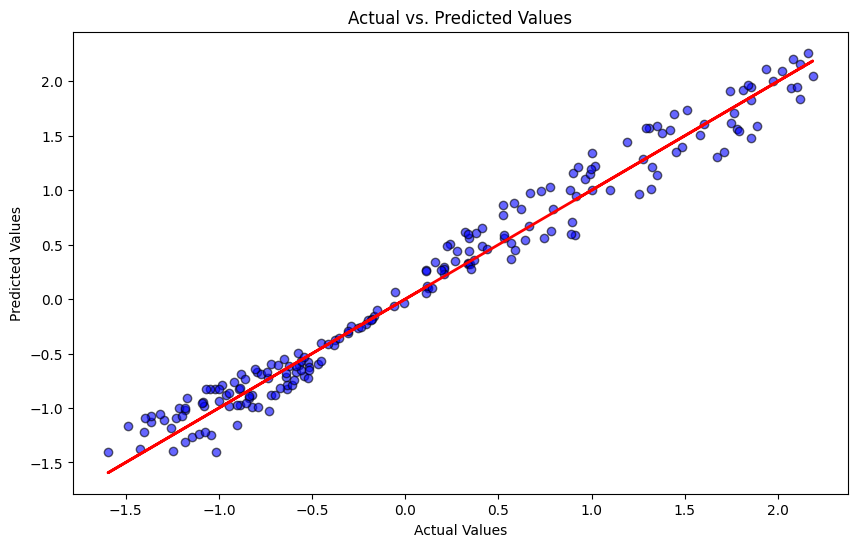

In [5]:
import matplotlib.pyplot as plt

# plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot(y_test, y_test, color='red', linewidth=2) 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
